In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/adinsa1/DATA205-PROJECT/refs/heads/main/Daily_Arrests_20241001%20(1).csv')

# **1. Filter Theft-Related Offenses**

In [3]:
theft_df = df[df['OFFENSE'].str.contains('theft',case=False,na=False)]
theft_df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
13,CLARK,MICHAEL,ALANZOE,40,1300 Block Of new york ave,WASHINGTON,DC,09/20/2024,"THEFT: $100 TO UNDER $1,500"
14,MEJIA POSADA,RENE,ALEXANDER,26,0 Block Of NINA CT,GAITHERSBURG,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
22,ESCOBAR,DEYANIRA,HILARIA,35,400 Block Of COLLEGE PKWY,ROCKVILLE,MD,09/20/2024,"THEFT: $100 TO UNDER $1,500"
30,WEST,MAIA,FRANCESCA,28,9900 Block Of BIG ROCK RD,SILVER SPRING,MD,09/21/2024,"THEFT: $1,500 TO UNDER $25,000"


In [4]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 3 to 472
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LAST NAME    96 non-null     object
 1   FIRST NAME   96 non-null     object
 2   MIDDLE NAME  76 non-null     object
 3   AGE          96 non-null     int64 
 4   STREET       96 non-null     object
 5   CITY         96 non-null     object
 6   STATE        96 non-null     object
 7   ARREST DATE  96 non-null     object
 8   OFFENSE      96 non-null     object
dtypes: int64(1), object(8)
memory usage: 9.6+ KB


In [5]:
theft_df.describe()

,AGE
count,96.000000
mean,33.114583
std,12.169738
min,18.000000
25%,24.750000
50%,28.500000
75%,40.000000
max,67.000000


# **2. Exploratory Data Analysis (EDA)**

**What is the total number of theft incidents?**
 There are 96 total theft.

---


**What is the range of ages involved in theft offenses?**
The youngest age is 18 and the oldest age is 67.

---



# **3. Visualizing Theft Offenses by Day of the Week**

<ipython-input-6-fac805db70e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['ARREST DATE']=pd.to_datetime(theft_df['ARREST DATE'])
<ipython-input-6-fac805db70e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['dayOfWeek']=theft_df['ARREST DATE'].dt.day_name()


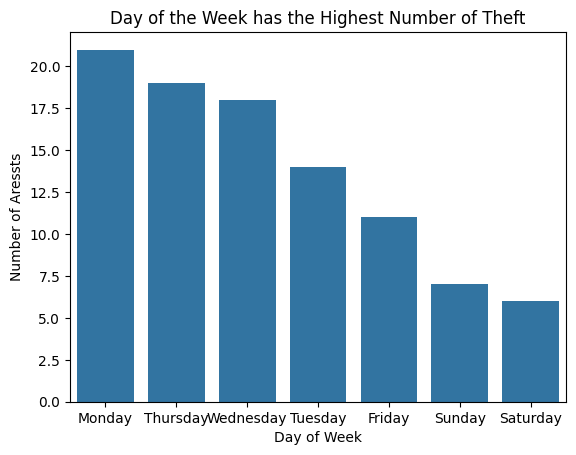

In [6]:
theft_df['ARREST DATE']=pd.to_datetime(theft_df['ARREST DATE'])
theft_df['dayOfWeek']=theft_df['ARREST DATE'].dt.day_name()

day_of_the_week = theft_df['dayOfWeek'].value_counts()

sns.barplot(x=day_of_the_week.index, y=day_of_the_week.values)

plt.title("Day of the Week has the Highest Number of Theft")
plt.xlabel("Day of Week")
plt.ylabel("Number of Aressts")

plt.show()

**Which day of the week has the highest number of theft arrests? What might be the reasons for this trend?** Monday has the highest number od theft arrests. I think the reason can be due to the fact that it is a business day and people might not be at home to work or go to school and that would make it an easier theft and police are more alert.

# **4. Age Distribution of Theft Offenders**

<Axes: xlabel='AGE', ylabel='Density'>

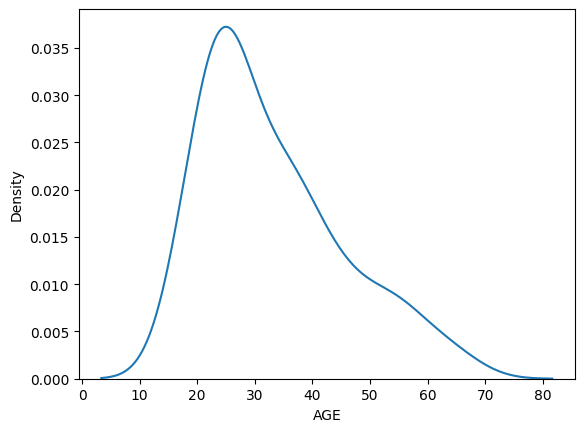

In [7]:
sns.kdeplot(theft_df['AGE'])

(array([20., 26.,  7., 15.,  8.,  6.,  4.,  5.,  3.,  2.]),
 array([18. , 22.9, 27.8, 32.7, 37.6, 42.5, 47.4, 52.3, 57.2, 62.1, 67. ]),
 <BarContainer object of 10 artists>)

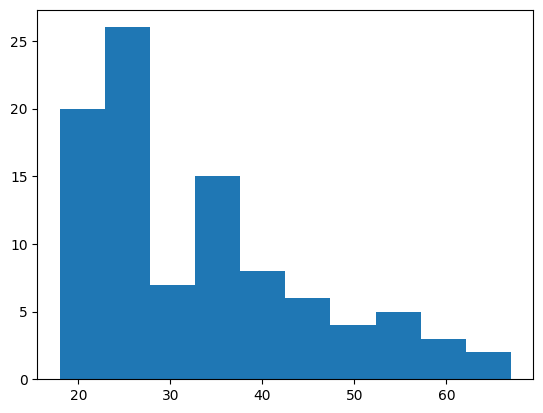

In [8]:
plt.hist(theft_df['AGE'])

**Which age group seems to be most involved in theft offenses?** The ages between 20-30 are the most involved in theft offenses.

# **5. Offense Analysis**

In [13]:
common_theft = theft_df['OFFENSE'].value_counts()
print(common_theft)

OFFENSE
THEFT: $100 TO UNDER $1,500              61
THEFT LESS THAN $100.00                  19
THEFT: $1,500 TO UNDER $25,000            9
THEFT SCHEME: $1,500 TO UNDER $25,000     3
ATT-THEFT: $1,500 TO UNDER $25,000        1
THEFT SCHEME: $100 TO UNDER $1,500        1
ATT-THEFT: $100 TO UNDER $1,500           1
THEFT: $25,000 TO UNDER $100,000          1
Name: count, dtype: int64


<ipython-input-17-fa5adb3a090d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_theft.index, y=common_theft.values, palette="dark")


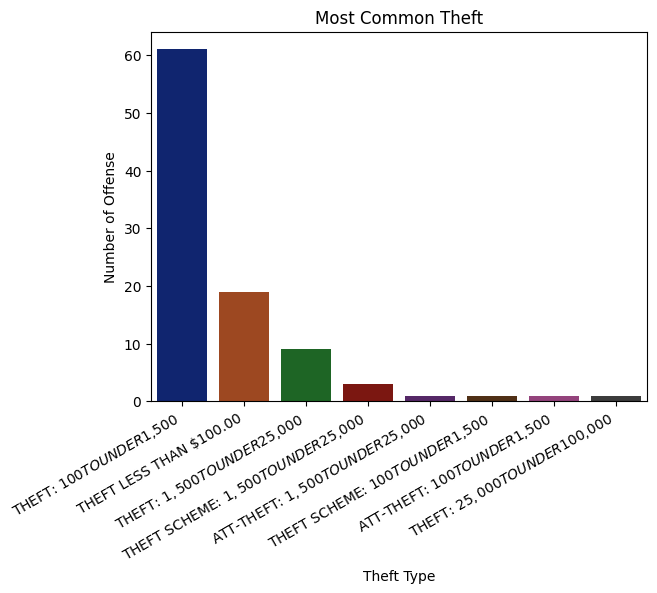

In [17]:
sns.barplot(x=common_theft.index, y=common_theft.values, palette="dark")

plt.title("Most Common Theft")
plt.xlabel("Theft Type")
plt.ylabel("Number of Offense")
plt.xticks(rotation=30, ha='right')
plt.show()

# **6. Theft Offense Type Categorized by Age**

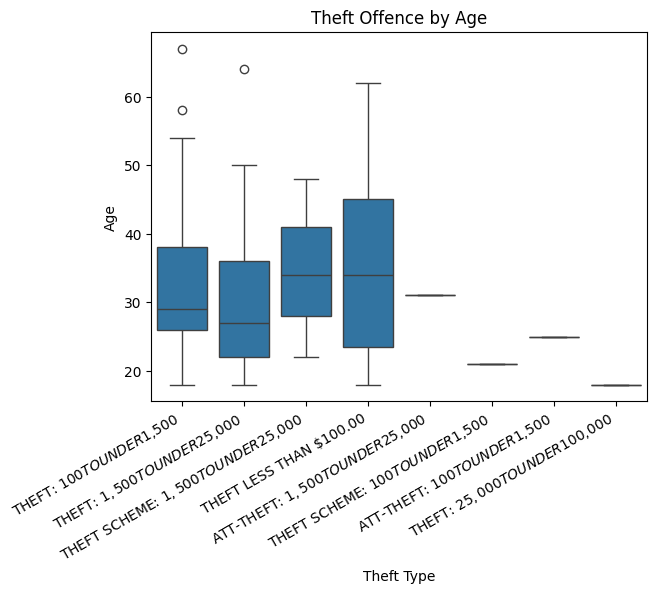

In [25]:
sns.boxplot(x='OFFENSE', y='AGE', data=theft_df)

plt.title("Theft Offence by Age")
plt.xlabel("Theft Type")
plt.ylabel("Age")
plt.xticks(rotation=30, ha='right')
plt.show()